In [92]:
import numpy as np
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy.stats import norm


In [66]:
df = pd.read_csv("../static/transaction_ut.csv")

In [67]:
df = df.sort_values(by="postDate")
# Remove the "Z" from the datetime strings
df["postDate"] = df["postDate"].str.replace("Z", "")

# Convert to datetime with the correct format
df["postDate"] = pd.to_datetime(df["postDate"], format="%Y-%m-%dT%H:%M:%S")

# Extract Year, Month, Day, Hour, Minute, and Second
df["Year"] = df["postDate"].dt.year
df["Month"] = df["postDate"].dt.month
df["Day"] = df["postDate"].dt.day
df["Hour"] = df["postDate"].dt.hour
df["Minute"] = df["postDate"].dt.minute
df["Second"] = df["postDate"].dt.second

In [68]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,...,transactionDate,postDate,subClass,links,Year,Month,Day,Hour,Minute,Second
288,transaction,312885c2-6ff6-4d96-89c9-0bf1b2987f46,posted,AGL RETAIL ENERGY LTD (GAS),-92.0,070c1d68-0ee0-477a-9679-294ea7059939,-99.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,...,13/12/2021,2021-12-13 00:00:00,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}""",2021,12,13,0,0,0
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,...,14/12/2021,2021-12-14 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,14,0,0,0
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,...,26/12/2021,2021-12-16 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,...,29/07/2023,2023-07-29 00:00:00,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}""",2023,7,29,0,0,0
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,...,3/08/2023,2023-08-03 00:00:00,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b...",2023,8,3,0,0,0
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0


In [69]:
columns_to_keep = ["postDate", "balance"]
df = df[columns_to_keep]
df['postDate'] = pd.to_datetime(df['postDate']).dt.date
df = df.groupby('postDate').agg({'balance': 'min'}).reset_index()

/var/folders/sb/kkpkz7y544ggcwh4h72qjmqc0000gn/T/ipykernel_4406/2051230037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postDate'] = pd.to_datetime(df['postDate']).dt.date


In [70]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-13,-759.34
2,2021-12-14,-558.34
3,2021-12-16,-357.34
4,2021-12-26,-759.84
...,...,...
158,2023-07-16,18474.06
159,2023-07-17,18675.06
160,2023-07-28,26367.06
161,2023-07-29,22514.56


In [71]:
df['postDate'] = pd.to_datetime(df['postDate'])
df.set_index('postDate', inplace=True)

# Then, resample the DataFrame with daily frequency and forward-fill missing values
df = df.resample('D').ffill()

# Reset the index to have 'postDate' as a regular column again
df.reset_index(inplace=True)

In [72]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-11,-259.34
2,2021-12-12,-259.34
3,2021-12-13,-759.34
4,2021-12-14,-558.34
...,...,...
597,2023-07-30,22514.56
598,2023-07-31,22514.56
599,2023-08-01,22514.56
600,2023-08-02,22514.56


In [73]:
df.set_index('postDate', inplace=True)

train_size = int(len(df) * 0.8)
train_data = df['balance'][:train_size]
test_data = df['balance'][train_size:]

In [79]:
p = 3  # Autoregressive order
d = 2  # Integrated order (differencing)
q = 3  # Moving Average order

In [80]:
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

/Users/shane.d/Documents/GitHub/Neo_Dolfin/neo_dolfin/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/shane.d/Documents/GitHub/Neo_Dolfin/neo_dolfin/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/shane.d/Documents/GitHub/Neo_Dolfin/neo_dolfin/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/shane.d/Documents/GitHub/Neo_Dolfin/neo_dolfin/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [81]:
# Define the number of months to forecast ahead
forecast_months = 365
forecast = model_fit.forecast(forecast_months)

# Create an index for the forecasted days
forecast_index = pd.date_range(start=df.index[0], periods=forecast_months, freq='D')

In [82]:
print("Forecasted Balances for the Next 12 Months:")
print(forecast)

Forecasted Balances for the Next 12 Months:
2023-04-05     6504.870679
2023-04-06     6526.999785
2023-04-07     6516.256197
2023-04-08     6535.023420
2023-04-09     6546.298285
                  ...     
2024-03-30    11475.083202
2024-03-31    11491.973735
2024-04-01    11502.773814
2024-04-02    11519.662524
2024-04-03    11530.464426
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [86]:
# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the z-score for the desired confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate the standard error of the mean (assuming normal distribution)
std_error = np.std(forecast) / np.sqrt(len(forecast))

# Calculate the margin of error
margin_of_error = z_score * std_error

# Calculate the lower and upper bounds for the confidence intervals
lower_bound = forecast - margin_of_error
upper_bound = forecast + margin_of_error

# Create a DataFrame with the forecasted values and their confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Print the DataFrame
print(forecast_df)

                Forecast   Lower Bound   Upper Bound
2023-04-05   6504.870679   6355.230454   6654.510903
2023-04-06   6526.999785   6377.359561   6676.640010
2023-04-07   6516.256197   6366.615972   6665.896421
2023-04-08   6535.023420   6385.383195   6684.663644
2023-04-09   6546.298285   6396.658061   6695.938510
...                  ...           ...           ...
2024-03-30  11475.083202  11325.442977  11624.723426
2024-03-31  11491.973735  11342.333510  11641.613959
2024-04-01  11502.773814  11353.133590  11652.414039
2024-04-02  11519.662524  11370.022300  11669.302749
2024-04-03  11530.464426  11380.824201  11680.104650

[365 rows x 3 columns]


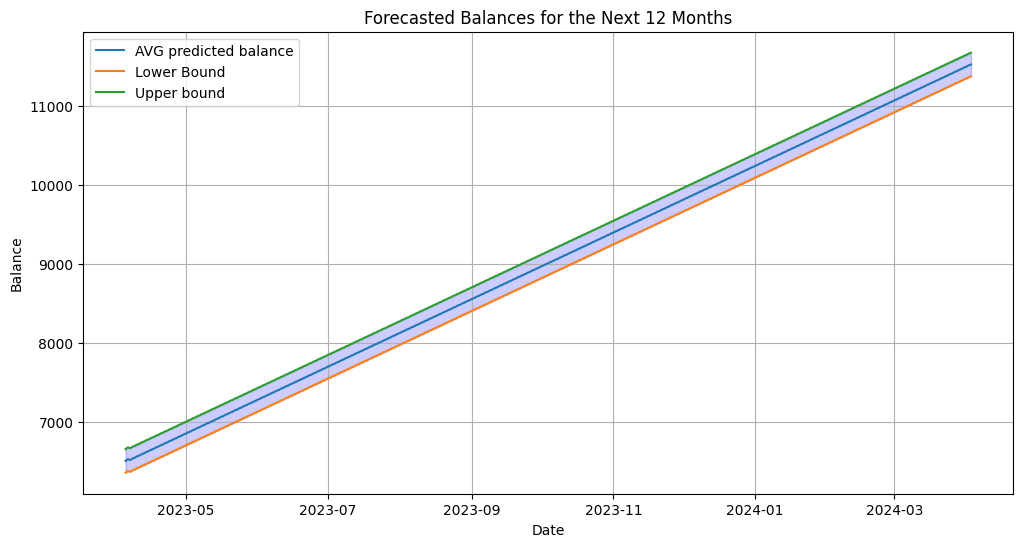

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df, label='Forecasted Balances')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'], alpha=0.2, color='b')
plt.title('Forecasted Balances for the Next 12 Months')
plt.legend(['AVG predicted balance','Lower Bound','Upper bound'])
plt.grid(True)
plt.show()

In [94]:
# Assuming you have an ARIMA model named 'model_fit' that you want to save
with open('savingsAImodel.pkl', 'wb') as model_file:
    pickle.dump(model_fit, model_file)
